# 2.住宅価格の回帰


Week3で使用したアイオワ州エイムズ市の住宅価格データセットを使い、回帰問題を解く練習をします。

79種類の特徴量（説明変数）を活用し、住宅価格の数値を推測する問題が設定できます。こういった連続値のものを推測する問題を回帰問題と呼びます。


[House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)


今回使う手法の一覧
scikit-laernを使い以下の手法で学習と推定を行っていきます。それぞれの手法についての詳細は今の段階では扱いません。ライブラリを使えばどれも気軽に利用できることや、手法毎の結果に違いがあることを簡単に見ていきます。

線形回帰
SVM
決定木
ランダムフォレスト

分類問題と回帰問題の両方で使える手法と、そうではない手法が存在します。


### 3.データセットの準備


Week3同様にKaggleからデータセットをダウンロードしてください。train.csvのみを使用します。


[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques)

### 4.回帰問題の流れ


回帰問題の流れは分類問題と基本的には同じですから、課題1のように細かい説明は行いません。

練習のための準備
このデータセットには79種類の特徴量（目的変数）がありますが、Week3で探索して分かったように様々なタイプのデータ含まれています。これをどう前処理するかということは機械学習において重要な箇所ですが、今回は回帰問題の学習や評価の練習を優先するため、説明変数(特徴量)GrLivAreaとYearBuiltの2つだけを利用することにします。

#### 【問題1】練習のために特徴量の選択
データセットを読み込んだ後、説明変数GrLivAreaとYearBuilt、目的変数SalePriceをそれぞれ抜き出してください。


In [826]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [827]:
train = pd.read_csv('../Week3/train.csv')

In [828]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [829]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [830]:
train = train[['GrLivArea','YearBuilt','SalePrice']]
train.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


#### 【問題2】線形回帰による推定と評価
データを簡単に分析、前処理し、 線形回帰 による学習、推定、評価、可視化までの一連の流れを作成・実行してください。


[sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


評価のための指標値は回帰問題では 平均二乗誤差（Mean Squared Error, MSE） を使うことが一般的です。


[sklearn.metrics.mean_squared_error — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


可視化は横軸にある特徴量、縦軸に推測した住宅価格といった方法で行えます。
scatterを用いて、実際のデータと予測結果を比較できるグラフを作りましょう。

In [831]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [832]:
train.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


<AxesSubplot:>

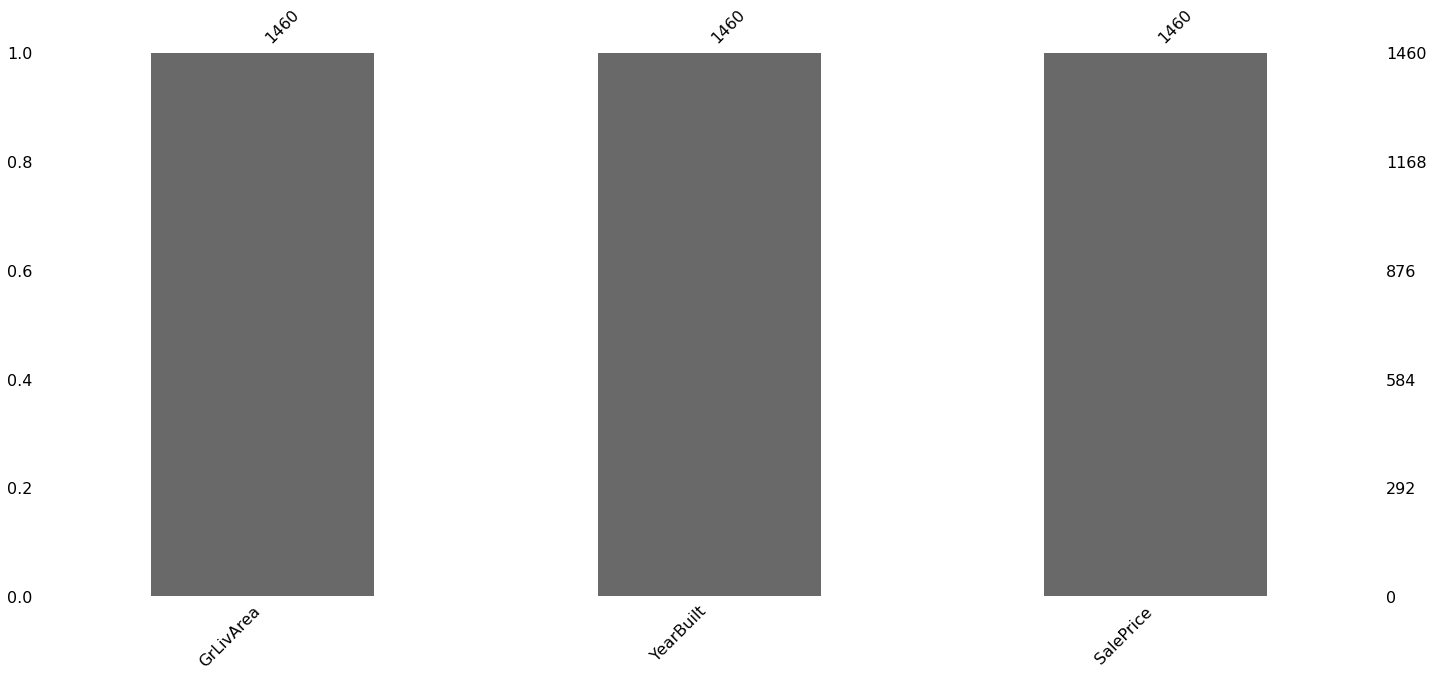

In [833]:
msno.bar(train)

In [834]:
train.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

<AxesSubplot:>

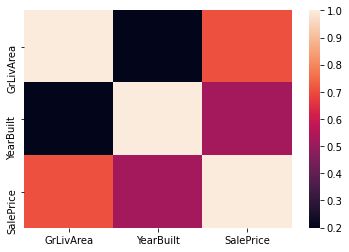

In [835]:
train_corr = train.corr()
sns.heatmap(train_corr)

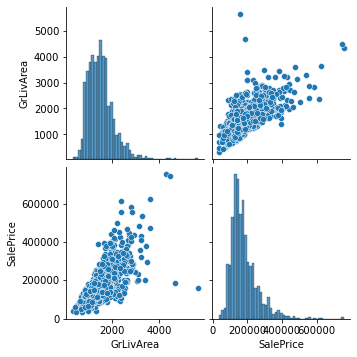

In [836]:
sns.pairplot(train.iloc[:,[0,2]])

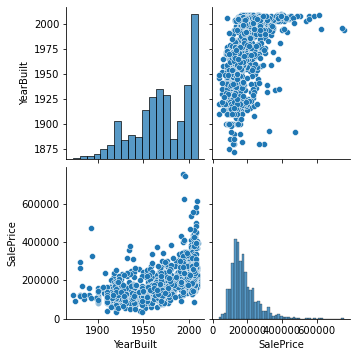

In [837]:
sns.pairplot(train.iloc[:,[1,2]])

YearBuilt      建造年  
GrLivArea      居住エリアの面積  

In [838]:
X_train,X_test,y_train,y_test = train_test_split(train.iloc[:,:2].values, train.iloc[:,2].values,test_size=0.30, random_state=0)
type(y_test)

numpy.ndarray

In [839]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [840]:
scx = StandardScaler()
scy = StandardScaler()
X_train_st = scx.fit_transform(X_train)
y_train_st = scy.fit_transform(y_train).flatten()
X_test_st = scx.transform(X_test)
y_test_st = scy.transform(y_test).flatten()

In [841]:
from sklearn.linear_model import LinearRegression

In [842]:
reg = LinearRegression().fit(X_train_st, y_train_st)
print(reg.score(X_train_st,y_train_st))
print(reg.score(X_test_st,y_test_st))

0.6770758352017019
0.6036748683842923


In [843]:
y_pre = reg.predict(X_test_st)
y_pre.shape

(438,)

In [844]:
from sklearn.metrics import mean_squared_error

指標

In [851]:
mean_squared_error(y_test_st,y_pre)

0.44110745316791095

In [852]:
type(y_pre)

numpy.ndarray

<AxesSubplot:ylabel='Density'>

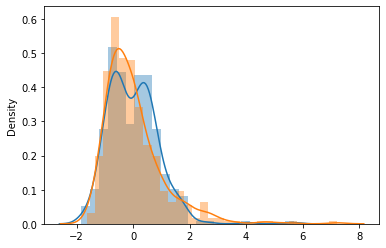

In [853]:
sns.distplot(y_pre)
sns.distplot(y_test_st)

対数変換からの評価

In [854]:
X_train,X_test,y_train,y_test = train_test_split(train.iloc[:,:2].values, train.iloc[:,2].values,test_size=0.30, random_state=0)
type(y_test)

numpy.ndarray

In [855]:
log_X_train = np.log(X_train[:,0])
log_y_train = np.log(y_train)
log_X_test = np.log(X_test[:,0])
log_y_test = np.log(y_test)

In [856]:
X_log_train = np.stack([log_X_train,X_train[:,1]],axis=1)
X_log_test = np.stack([log_X_test,X_test[:,1]],axis=1)
print(X_log_train.shape)

(1022, 2)


標準化


In [866]:
log_y_train = log_y_train.reshape(len(log_y_train),1)
log_y_test = log_y_test.reshape(len(log_y_test),1)

In [867]:
sc_logx = StandardScaler()
sc_logy = StandardScaler()
X_log_sc_train = sc_logx.fit_transform(X_log_train)
y_log_sc_train = sc_logy.fit_transform(log_y_train).flatten()
X_log_sc_test = sc_logx.transform(X_log_test)
y_log_sc_test = sc_logy.transform(log_y_test).flatten()

In [868]:
reg_sc_log = LinearRegression().fit(X_log_sc_train,y_log_sc_train)
print(reg_sc_log.score(X_log_sc_train,y_log_sc_train))
print(reg_sc_log.score(X_log_sc_test,y_log_sc_test))

0.7156193676669158
0.7130326610064281


In [869]:
y_log_sc_pre = reg_sc_log.predict(X_log_sc_test)
y_log_sc_pre.shape


(438,)

In [873]:
mean_squared_error(y_log_sc_test,y_log_sc_pre)

0.274445591466793

<AxesSubplot:ylabel='Density'>

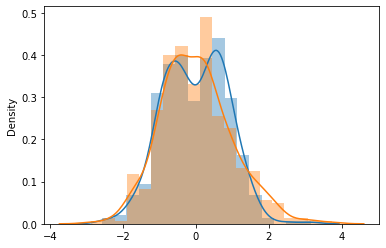

In [665]:
sns.distplot(y_log_sc_pre)
sns.distplot(y_log_sc_test)

In [651]:
from sklearn.metrics import r2_score
r2 = r2_score(y_log_sc_test, y_log_sc_pre)
r2

0.7130326610064281

In [652]:
# in_y = sc.inverse_transform(y_log_sc_pre)
# # ex_y = np.exp(in_y)
# r22 = r2_score(y_test,in_y)
# r22

Text(0.5, 1.0, 'std')

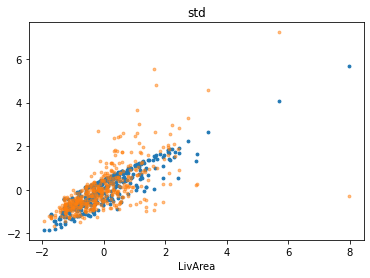

In [653]:
plt.scatter(X_test_st[:,0],y_pre,s=8)
plt.scatter(X_test_st[:,0],y_test_st,s=8, alpha=0.5)
plt.xlabel('LivArea')
plt.title('std')

Text(0.5, 1.0, 'log_std')

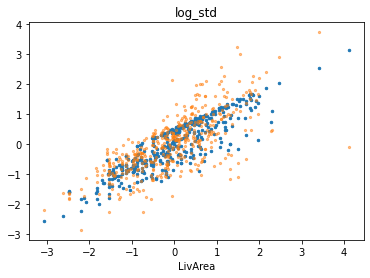

In [654]:
plt.scatter(X_log_sc_test[:,0],y_log_sc_pre,s=6)
plt.scatter(X_log_sc_test[:,0],y_log_sc_test,s=5,alpha=0.5)
plt.xlabel('LivArea')
plt.title('log_std')

<AxesSubplot:ylabel='Density'>

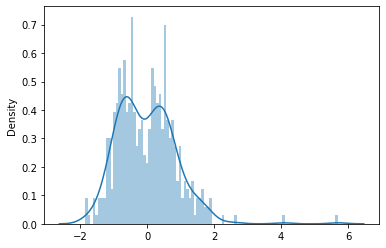

In [655]:
sns.distplot(y_pre, bins=100)

<AxesSubplot:ylabel='Density'>

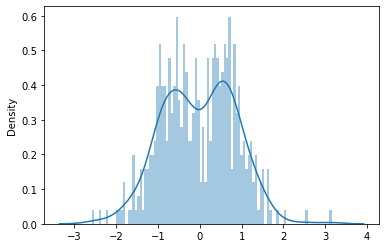

In [656]:
sns.distplot(y_log_sc_pre, bins=100)

Text(0.5, 1.0, 'std')

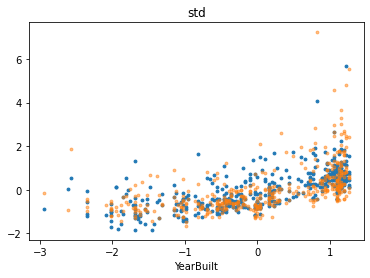

In [657]:
plt.scatter(X_test_st[:,1],y_pre,s=8)
plt.scatter(X_test_st[:,1],y_test_st,s=8, alpha=0.5)
plt.xlabel('YearBuilt')
plt.title('std')

Text(0.5, 1.0, 'log_std')

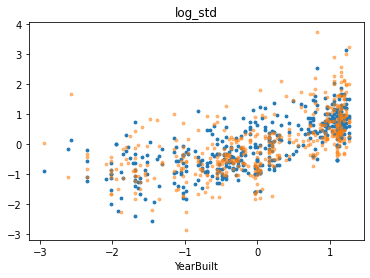

In [658]:
plt.scatter(X_log_sc_test[:,1],y_log_sc_pre,s=8)
plt.scatter(X_log_sc_test[:,1],y_log_sc_test,s=8,alpha=0.5)
plt.xlabel('YearBuilt')
plt.title('log_std')

#### 【問題3】手法の比較
以下の全ての手法について学習・推定・評価・可視化を行ってください。そして、指標値を１つの表にまとめてください。その表と可視化した図を利用して結果を簡単に考察してください。どの手法がどの指標値が良かったかや、どういった図になっていたかを述べてください。

線形回帰
SVM
決定木
ランダムフォレスト

公式ドキュメントへのリンクは以下です。本来はパラメータチューニングを行いますが、まずはデフォルトの値で実行しましょう。


- [sklearn.linear_model.LinearRegression — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)  
-[sklearn.svm.SVR — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)  
-[sklearn.tree.DecisionTreeRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)  
-[sklearn.ensemble.RandomForestRegressor — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)  


SVM、決定木、ランダムフォレストは分類問題でも使用した手法ですが、回帰問題用のライブラリはそれぞれ専用のものに分かれています。


In [659]:
#SVM
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

#決定木
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [669]:
def linear(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)
        
    y_train = y_train.reshape(len(y_train),1)
    y_test = y_test.reshape(len(y_test),1)
    
    scx = StandardScaler()
    scy = StandardScaler()
    X_train_st = scx.fit_transform(X_train)
    y_train_st = scy.fit_transform(y_train).flatten()
    X_test_st = scx.transform(X_test)
    y_test_st = scy.transform(y_test).flatten()
    reg = LinearRegression().fit(X_train_st, y_train_st)
    y_pre = reg.predict(X_test_st)
    lin = mean_squared_error(y_test_st,y_pre)
    plt.scatter(X_test_st[:,0],y_pre)
    plt.scatter(X_test_st[:,0],y_test_st,s=6)
    plt.xlabel('LivArea')
    plt.title('Linear')
    plt.show()
    plt.scatter(X_test_st[:,1],y_pre)
    plt.scatter(X_test_st[:,1],y_test_st,s=6)
    plt.xlabel('YearBuilt')
    plt.show()
    
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)
    y_train = y_train.reshape(len(y_train),1)
    y_test = y_test.reshape(len(y_test),1)    
    scx = StandardScaler()
    scy = StandardScaler()
    X_train_st = scx.fit_transform(X_train)
    y_train_st = scy.fit_transform(y_train).flatten()
    X_test_st = scx.transform(X_test)
    y_test_st = scy.transform(y_test).flatten()
    reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)).fit(X_train_st, y_train_st)
    y_pre = reg.predict(X_test_st)
    sv = mean_squared_error(y_test_st,y_pre)
    plt.scatter(X_test_st[:,0],y_pre)
    plt.scatter(X_test_st[:,0],y_test_st,s=6)
    plt.xlabel('LivArea')
    plt.title('SVM')
    plt.show()
    plt.scatter(X_test_st[:,1],y_pre)
    plt.scatter(X_test_st[:,1],y_test_st,s=6)
    plt.xlabel('YearBuilt')
    plt.show()

    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)       
    y_train = y_train.reshape(len(y_train),1)
    y_test = y_test.reshape(len(y_test),1)
    scx = StandardScaler()
    scy = StandardScaler()
    X_train_st = scx.fit_transform(X_train)
    y_train_st = scy.fit_transform(y_train).flatten()
    X_test_st = scx.transform(X_test)
    y_test_st = scy.transform(y_test).flatten()
    reg = DecisionTreeRegressor().fit(X_train_st, y_train_st)
    y_pre = reg.predict(X_test_st)
    tr = mean_squared_error(y_test_st,y_pre)  
    plt.scatter(X_test_st[:,0],y_pre)
    plt.scatter(X_test_st[:,0],y_test_st,s=6)
    plt.xlabel('LivArea')
    plt.title('tree')
    plt.show()
    plt.scatter(X_test_st[:,1],y_pre)
    plt.scatter(X_test_st[:,1],y_test_st,s=6)
    plt.xlabel('YearBuilt')
    plt.show()
    
        
    X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=0)
        
    y_train = y_train.reshape(len(y_train),1)
    y_test = y_test.reshape(len(y_test),1)
    scx = StandardScaler()
    scy = StandardScaler()
    X_train_st = scx.fit_transform(X_train)
    y_train_st = scy.fit_transform(y_train).flatten()
    X_test_st = scx.transform(X_test)
    y_test_st = scy.transform(y_test).flatten()
    reg = RandomForestRegressor().fit(X_train_st, y_train_st)
    y_pre = reg.predict(X_test_st)
    ra = mean_squared_error(y_test_st,y_pre)     
    plt.scatter(X_test_st[:,0],y_pre)
    plt.scatter(X_test_st[:,0],y_test_st,s=6)
    plt.xlabel('LivArea')
    plt.title('randomforest')
    plt.show()
    plt.scatter(X_test_st[:,1],y_pre)
    plt.scatter(X_test_st[:,1],y_test_st,s=6)
    plt.xlabel('YearBuilt')
    plt.show()
    
    mse = [lin,sv,tr,ra]
    
    return mse


In [670]:
train4 = train.iloc[:,:2].values
sale = train.iloc[:,2].values

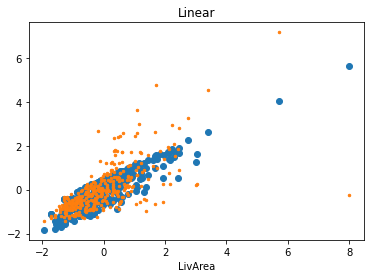

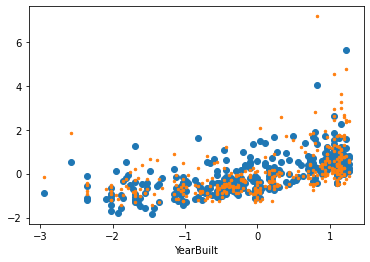

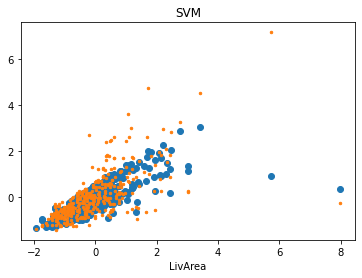

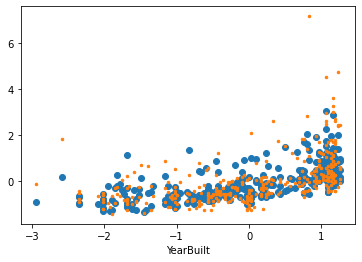

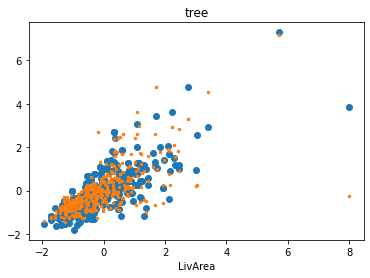

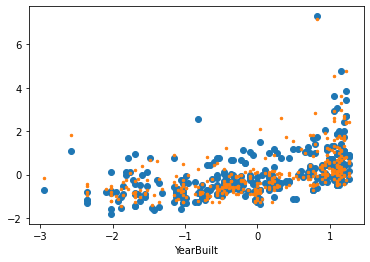

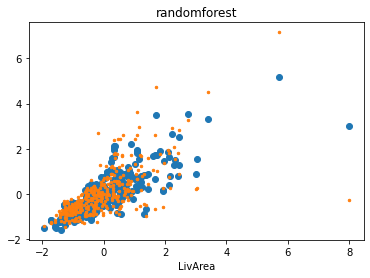

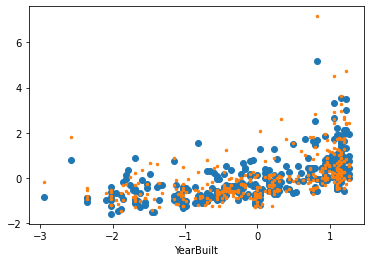

In [671]:
mse = linear(train4,sale)

In [663]:
pd.DataFrame(mse,columns=['mse'],index=['Linear','SVM','tree','randomforest'])

,mse
Linear,0.439077
SVM,0.368899
tree,0.521044
randomforest,0.295180


平均二乗誤差 (MSE) は、モデル予測とターゲット値の差の二乗の平均。  
なので、値が小さいほど良い値ということになる。  
一番良い結果となったのがランダムフォレストで、決定木が悪い結果として現れた。 　


グラフとしてはmseの値が大きいほどプロットがばらけている。


#### 【問題4】（アドバンス課題）他の特徴量も使用しての学習
ここまでは練習のために2つの特徴量だけを使いましたが、他の特徴量を加えるとどのようになるか検証してください。どう選択・加工するかにはデータ分析が重要になってきます。

KaggleのNotebooksも参考にできます。

[House Prices: Advanced Regression Techniques | Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels)

欠損データを埋める

In [739]:
train = pd.read_csv('../Week3/train.csv')

In [740]:
total = train.isnull().sum().sort_values(ascending=False)
total.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
dtype: int64

In [741]:
total[:20].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Id'],
      dtype='object')

In [742]:
cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical']

In [743]:
for i in cols:
    train[i].fillna('None',inplace=True)

In [744]:
total = train.isnull().sum().sort_values(ascending=False)
total.head()

Id             0
CentralAir     0
GarageYrBlt    0
GarageType     0
FireplaceQu    0
dtype: int64

In [745]:
train.isnull().sum().sum()

0

上記で欠損データをなくすことができた。

正規分布なのかを分析するため、歪度と尖度を調査する。

In [748]:
num_data = train.dtypes[train.dtypes !="object"].index
num_data

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [749]:
train[num_data].head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000


In [750]:
for i in num_data:
    print("{:15}".format(i), 
          "S:{:05.2f}".format(train[i].skew())," ","K:{:06.2f}".format(train[i].kurt()))

Id              S:00.00   K:-01.20
MSSubClass      S:01.41   K:001.58
LotArea         S:12.21   K:203.24
OverallQual     S:00.22   K:000.10
OverallCond     S:00.69   K:001.11
YearBuilt       S:-0.61   K:-00.44
YearRemodAdd    S:-0.50   K:-01.27
BsmtFinSF1      S:01.69   K:011.12
BsmtFinSF2      S:04.26   K:020.11
BsmtUnfSF       S:00.92   K:000.47
TotalBsmtSF     S:01.52   K:013.25
1stFlrSF        S:01.38   K:005.75
2ndFlrSF        S:00.81   K:-00.55
LowQualFinSF    S:09.01   K:083.23
GrLivArea       S:01.37   K:004.90
BsmtFullBath    S:00.60   K:-00.84
BsmtHalfBath    S:04.10   K:016.40
FullBath        S:00.04   K:-00.86
HalfBath        S:00.68   K:-01.08
BedroomAbvGr    S:00.21   K:002.23
KitchenAbvGr    S:04.49   K:021.53
TotRmsAbvGrd    S:00.68   K:000.88
Fireplaces      S:00.65   K:-00.22
GarageCars      S:-0.34   K:000.22
GarageArea      S:00.18   K:000.92
WoodDeckSF      S:01.54   K:002.99
OpenPorchSF     S:02.36   K:008.49
EnclosedPorch   S:03.09   K:010.43
3SsnPorch       S:10

In [751]:
# for i in num_data:
#     sns.distplot(train[i])
#     plt.show()

全てを視覚化したのちに影響がありそうなLotArea GrLivArea SalePraiceを対数変換する

In [753]:
train["GLA_log"] = np.log(train["GrLivArea"])
train["LA_log"]= np.log(train["LotArea"])
train["SP_log"]= np.log(train["SalePrice"])

In [754]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GLA_log,LA_log,SP_log
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,0,2,2008,WD,Normal,208500,7.444249,9.041922,12.247694
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,0,5,2007,WD,Normal,181500,7.140453,9.169518,12.109011
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,0,9,2008,WD,Normal,223500,7.487734,9.328123,12.317167
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,0,2,2006,WD,Abnorml,140000,7.448334,9.164296,11.849398
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,0,12,2008,WD,Normal,250000,7.695303,9.565214,12.429216


In [755]:
train.drop("GrLivArea", inplace= True, axis = 1)
train.drop("LotArea", inplace= True, axis = 1)
train.drop("SalePrice", inplace= True, axis = 1)

In [756]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GLA_log,LA_log,SP_log
0,1,60,RL,65.0,Pave,None,Reg,Lvl,AllPub,Inside,...,None,None,0,2,2008,WD,Normal,7.444249,9.041922,12.247694
1,2,20,RL,80.0,Pave,None,Reg,Lvl,AllPub,FR2,...,None,None,0,5,2007,WD,Normal,7.140453,9.169518,12.109011
2,3,60,RL,68.0,Pave,None,IR1,Lvl,AllPub,Inside,...,None,None,0,9,2008,WD,Normal,7.487734,9.328123,12.317167
3,4,70,RL,60.0,Pave,None,IR1,Lvl,AllPub,Corner,...,None,None,0,2,2006,WD,Abnorml,7.448334,9.164296,11.849398
4,5,60,RL,84.0,Pave,None,IR1,Lvl,AllPub,FR2,...,None,None,0,12,2008,WD,Normal,7.695303,9.565214,12.429216


GLA_log   -0.006995
LA_log    -0.137994
SP_log     0.121335
dtype: float64
GLA_log    0.282603
LA_log     4.713358
SP_log     0.809532
dtype: float64


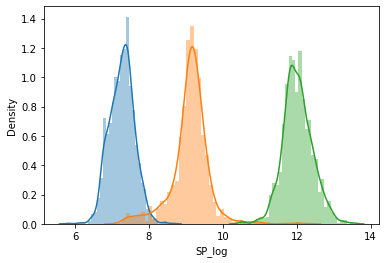

In [758]:
sns.distplot(train["GLA_log"])
sns.distplot(train["LA_log"])
sns.distplot(train["SP_log"])

print(train[["GLA_log","LA_log","SP_log"]].skew())
print(train[["GLA_log","LA_log","SP_log"]].kurt())

目的変数と相関が強いもののみを使用することにした。

In [760]:
corr = train.corr()

絶対値化してマイナス相関をなくす。

In [777]:
corr_abs = corr.abs()
corr_st = corr_abs["SP_log"].sort_values(ascending=False)
corr_st[corr_st>0.4].index.values

array(['SP_log', 'OverallQual', 'GLA_log', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'TotRmsAbvGrd', 'Fireplaces'], dtype=object)

目的関数と0.4以上相関があるもので評価を行う。

<AxesSubplot:>

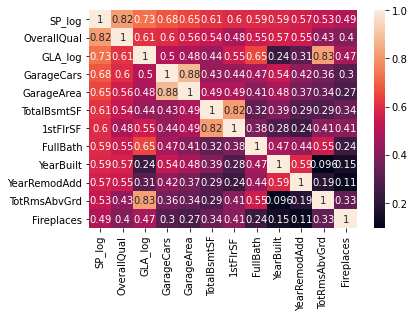

In [783]:
corr = train[['SP_log', 'OverallQual', 'GLA_log', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd',
       'TotRmsAbvGrd', 'Fireplaces']].corr()
sns.heatmap(corr,annot=True)

説明変数どうしで相関関係が強いと予測が下がってしまう、それを多重共線性という。
目的変数との相関係数が小さい方を削除する。

GLA_log TotRmsAbvGrd  
GarageCars Garagearea  
TotalBsmtSF 1stFlrSF  



In [795]:
cols = corr.index
cols = list(cols)
cols.remove("TotRmsAbvGrd")
cols.remove("GarageArea")
cols.remove("1stFlrSF")

In [796]:
print(cols)

['SP_log', 'OverallQual', 'GLA_log', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces']


上記の変数を使って評価を行うこととした。

In [800]:
X_train,X_test,y_train,y_test =train_test_split(train[['OverallQual', 'GLA_log',
                      'GarageCars', 'TotalBsmtSF',
                      'FullBath', 'YearBuilt', 'YearRemodAdd',
                      'Fireplaces']].values,
                 train['SP_log'].values,random_state=0)

標準化

In [803]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)

In [804]:
scx = StandardScaler()
scy = StandardScaler()
X_train_st = scx.fit_transform(X_train)
y_train_st = scy.fit_transform(y_train).flatten()
X_test_st = scx.transform(X_test)
y_test_st = scy.transform(y_test).flatten()

線形回帰による学習を行う。

In [806]:
reg = LinearRegression().fit(X_train_st,y_train_st)
y_pre = reg.predict(X_test_st)

In [807]:
mean_squared_error(y_test_st,y_pre)

0.1924351639349529

#### 結論：二つの説明関数を使った時よりも優秀な値となった

In [ ]:
目的変数を標準化しなかった場合

In [808]:
reg2 = LinearRegression().fit(X_train_st,y_train)
y_pre2 = reg2.predict(X_test_st)

In [809]:
mean_squared_error(y_test,y_pre2)

0.03137023505491701

In [ ]:
目的変数に標準化をしなければ値がものすごく変化し、よくなる。
今後の課題とする。

In [813]:
y_pre_re = scy.inverse_transform(y_pre)

In [814]:
mean_squared_error(y_test,y_pre_re)

0.03137023505491703